In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import seaborn as sns
%matplotlib inline

In [ ]:
iris = datasets.load_iris()

In [ ]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data = pd.DataFrame(iris.data, columns=columns)
label= pd.DataFrame(iris.target, columns=['Species'])
data = pd.concat([data, label], axis=1)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Petal-length Vs Petal-Width and Sepal-length Vs Sepal-Width

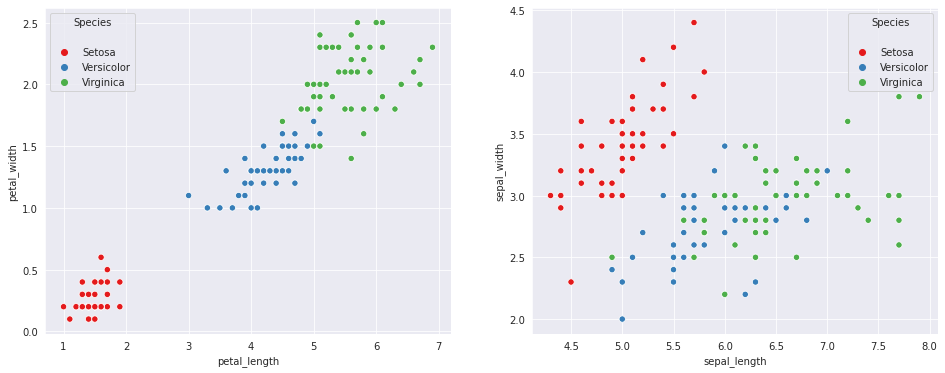

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
ax1 = plt.gca()
#plt.figure(figsize=(8,8))
sns.scatterplot(x='petal_length', y ='petal_width', hue='Species', data=data, s=40,
                 palette='Set1', ax = ax1)
l = ax1.legend()
l.get_texts()[0].set_text('') # You can also change the legend title
l.get_texts()[1].set_text('Setosa')
l.get_texts()[2].set_text('Versicolor')
l.get_texts()[3].set_text('Virginica')
l.set_title("Species")
#print(l.set_text(["aa", 'asa', 'dw', 'dwq']))

plt.subplot(1,2,2)
ax2 = plt.gca()
#plt.figure(figsize=(8,8))
sns.scatterplot(x='sepal_length', y ='sepal_width', hue='Species', data=data, s=40,
                 palette='Set1', ax=ax2)
l = ax2.legend()
l.get_texts()[0].set_text('') # You can also change the legend title
l.get_texts()[1].set_text('Setosa')
l.get_texts()[2].set_text('Versicolor')
l.get_texts()[3].set_text('Virginica')
l.set_title("Species")
plt.show()

### sepal-length Vs petal-length and sepal-width Vs petal-length

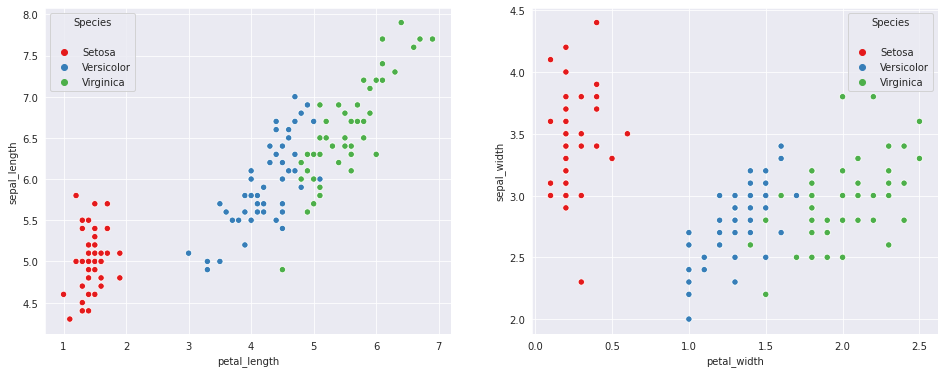

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
ax1 = plt.gca()
#plt.figure(figsize=(8,8))
sns.scatterplot(x='petal_length', y ='sepal_length', hue='Species', data=data, s=40,
                 palette='Set1', ax = ax1)
l = ax1.legend()
l.get_texts()[0].set_text('') # You can also change the legend title
l.get_texts()[1].set_text('Setosa')
l.get_texts()[2].set_text('Versicolor')
l.get_texts()[3].set_text('Virginica')
l.set_title("Species")
#print(l.set_text(["aa", 'asa', 'dw', 'dwq']))

plt.subplot(1,2,2)
ax2 = plt.gca()
#plt.figure(figsize=(8,8))
sns.scatterplot(x='petal_width', y ='sepal_width', hue='Species', data=data, s=40,
                 palette='Set1', ax=ax2)
l = ax2.legend()
l.get_texts()[0].set_text('') # You can also change the legend title
l.get_texts()[1].set_text('Setosa')
l.get_texts()[2].set_text('Versicolor')
l.get_texts()[3].set_text('Virginica')
l.set_title("Species")
plt.show()

In [ ]:
def distributionplot(column):
  df = data[column]
  sns.distplot(df, )
  plt.show()

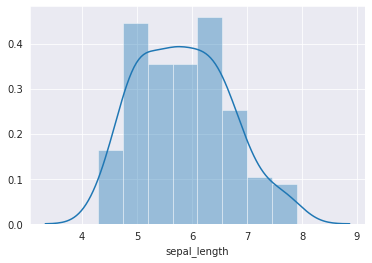

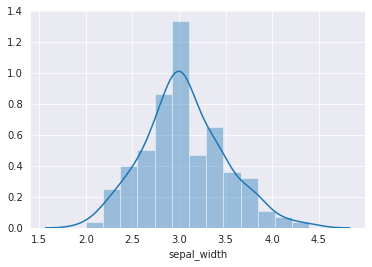

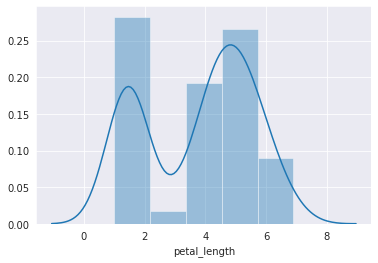

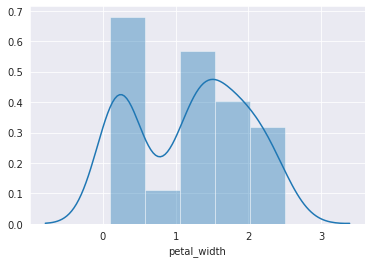

In [ ]:
for column in columns:
  distributionplot(column)

In [ ]:
def categoricaldistplot(column, i):
  sns.pairplot(data[[column] + ['Species']], hue='Species')
  

<Figure size 1440x1440 with 0 Axes>

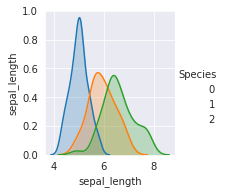

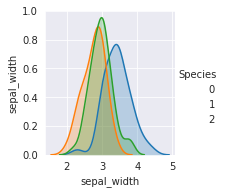

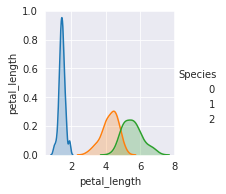

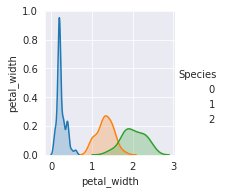

In [ ]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(columns):
  categoricaldistplot(column, i)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
print("train: ", model.score(X_train, Y_train))
print("test: ", model.score(X_test, Y_test))

train:  0.975
test:  0.9333333333333333


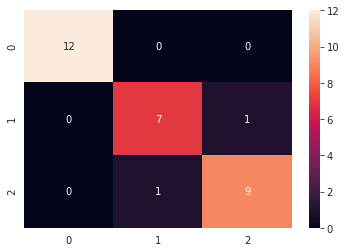

In [ ]:
from sklearn.metrics import confusion_matrix
cnff = confusion_matrix(Y_test, model.predict(X_test))
sns.heatmap(cnff, annot=True)

In [ ]:
df = data[columns]
y = pd.DataFrame(model.predict(iris.data), columns=['Pridicted'])
df = pd.concat([df, y], axis=1)

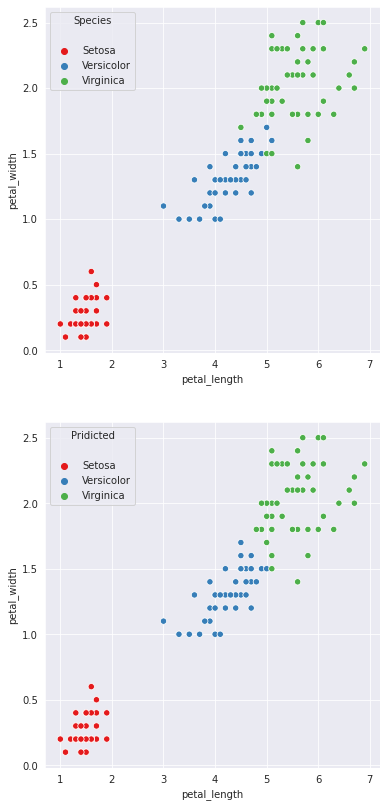

In [ ]:
plt.figure(figsize=(14, 14))
plt.subplot(1,2,1)
ax1 = plt.gca()
#plt.figure(figsize=(8,8))
sns.scatterplot(x='petal_length', y ='petal_width', hue='Species', data=data, s=40,
                 palette='Set1', ax = ax1)
l = ax1.legend()
l.get_texts()[0].set_text('') # You can also change the legend title
l.get_texts()[1].set_text('Setosa')
l.get_texts()[2].set_text('Versicolor')
l.get_texts()[3].set_text('Virginica')
l.set_title("Species")

plt.subplot(2,1,2)
ax2 = plt.gca()
#plt.figure(figsize=(8,8))
sns.scatterplot(x='petal_length', y ='petal_width', hue='Pridicted', data=df, s=40,
                 palette='Set1', ax = ax2)
l = ax2.legend()
l.get_texts()[0].set_text('') # You can also change the legend title
l.get_texts()[1].set_text('Setosa')
l.get_texts()[2].set_text('Versicolor')
l.get_texts()[3].set_text('Virginica')
l.set_title("Pridicted")